### Importing the data

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

## Importing the data
data = pd.read_csv('Churn.csv')
y = data.iloc[:, -1].values

### Understanding the data

In [4]:
print data.head(15)
data.shape

    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   7590-VHVEG  Female              0     Yes         No       1           No   
1   5575-GNVDE    Male              0      No         No      34          Yes   
2   3668-QPYBK    Male              0      No         No       2          Yes   
3   7795-CFOCW    Male              0      No         No      45           No   
4   9237-HQITU  Female              0      No         No       2          Yes   
5   9305-CDSKC  Female              0      No         No       8          Yes   
6   1452-KIOVK    Male              0      No        Yes      22          Yes   
7   6713-OKOMC  Female              0      No         No      10           No   
8   7892-POOKP  Female              0     Yes         No      28          Yes   
9   6388-TABGU    Male              0      No        Yes      62          Yes   
10  9763-GRSKD    Male              0     Yes        Yes      13          Yes   
11  7469-LKBCI    Male      

(7043, 21)

In [5]:
data.columns

Index([u'customerID', u'gender', u'SeniorCitizen', u'Partner', u'Dependents',
       u'tenure', u'PhoneService', u'MultipleLines', u'InternetService',
       u'OnlineSecurity', u'OnlineBackup', u'DeviceProtection', u'TechSupport',
       u'StreamingTV', u'StreamingMovies', u'Contract', u'PaperlessBilling',
       u'PaymentMethod', u'MonthlyCharges', u'TotalCharges', u'Churn'],
      dtype='object')

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data Manipulation

In [9]:
## Data Manipulation

#dropping customer ID, since it does not affects the prediction
mylist = data['customerID']
data = data.drop('customerID', 1)

In [10]:
#binary categorical variables into 1 and 0
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': 1, 'No': 0})
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [11]:
#Label Encoding and OneHotEncoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X = data.iloc[:, :-2].values
encoder_X = LabelEncoder()
encoder_y = LabelEncoder()
labelencode_list = [6, 7, 8, 9, 10, 11, 12, 13, 14, 16]
for i in labelencode_list:
 	X[:, i] = encoder_X.fit_transform(X[:, i])
y = encoder_y.fit_transform(y)

In [13]:
for i in ['gender', 'Partner', 'SeniorCitizen', 'Dependents', 'MultipleLines', 'InternetService', 
'TechSupport', 'StreamingTV', 'Contract']:
	data.groupby(i).Churn.mean(),'\n' 

### Data Visualization

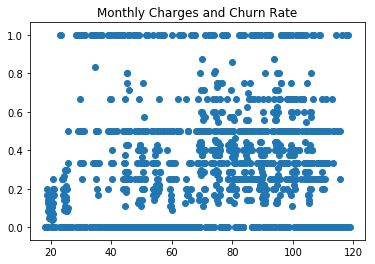

In [14]:
#Scatter plot of numerical variables
month_plot = data.groupby('MonthlyCharges').Churn.mean().reset_index()
myX = month_plot['MonthlyCharges']
myY = month_plot['Churn']
plt.title('Monthly Charges and Churn Rate')
plt.scatter(myX, myY)

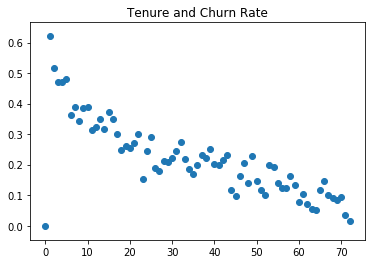

In [15]:
tenure_plot = data.groupby('tenure').Churn.mean().reset_index()
myX = tenure_plot['tenure']
myY = tenure_plot['Churn']
plt.title('Tenure and Churn Rate')
plt.scatter(myX, myY)

Text(0.5,1,'Churn Distribution accoring to Partner')

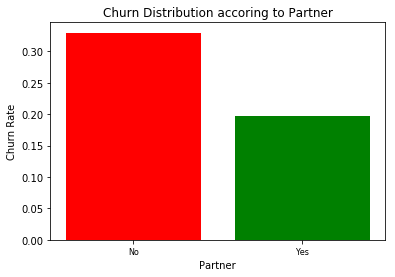

In [16]:
#Bar graph of categorical variables
x = data.groupby('Partner').Churn.mean()
label = ['No', 'Yes']
share = [x[0], x[1]]
colors = ['red', 'green']
index = np.arange(len(label))
plt.bar(index, share, color = colors)
plt.xlabel('Partner', fontsize = 10)
plt.ylabel('Churn Rate', fontsize = 10)
plt.xticks(index, label, fontsize = 8)
plt.title('Churn Distribution accoring to Partner')

Text(0.5,1,'Churn Distribution accoring to Payment Mode')

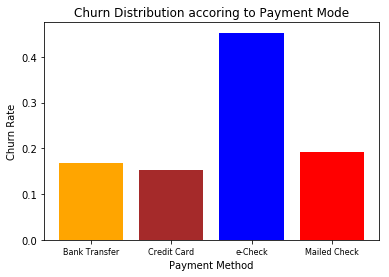

In [17]:
x = data.groupby('PaymentMethod').Churn.mean()
my_colors = ['orange', 'brown', 'blue', 'red']
label = ['Bank Transfer', 'Credit Card', 'e-Check', 'Mailed Check']
share = [x[0], x[1], x[2], x[3]]
index = np.arange(len(label))
plt.bar(index, share, color = my_colors)
plt.xlabel('Payment Method', fontsize = 10)
plt.ylabel('Churn Rate', fontsize = 10)
plt.xticks(index, label, fontsize = 8)
plt.title('Churn Distribution accoring to Payment Mode')


Text(0.5,1,'Churn Distribution accoring to Contract Type')

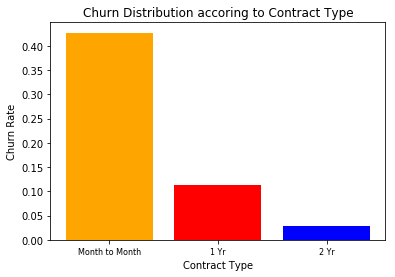

In [18]:
x = data.groupby('Contract').Churn.mean()
my_colors = ['orange', 'red', 'blue']
label = ['Month to Month', '1 Yr', '2 Yr']
share = [x[0], x[1], x[2]]
index = np.arange(len(label))
plt.bar(index, share, color = my_colors)
plt.xlabel('Contract Type', fontsize = 10)
plt.ylabel('Churn Rate', fontsize = 10)
plt.xticks(index, label, fontsize = 8)
plt.title('Churn Distribution accoring to Contract Type')

Text(0.5,1,'Churn Distribution accoring to Tech Support')

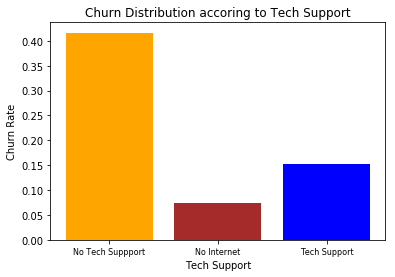

In [20]:
x = data.groupby('TechSupport').Churn.mean()
my_colors = ['orange', 'brown', 'blue']
label = ['No Tech Suppport', 'No Internet', 'Tech Support']
share = [x[0], x[1], x[2]]
index = np.arange(len(label))
plt.bar(index, share, color = my_colors)
plt.xlabel('Tech Support', fontsize = 10)
plt.ylabel('Churn Rate', fontsize = 10)
plt.xticks(index, label, fontsize = 8)
plt.title('Churn Distribution accoring to Tech Support')

### Conclusion: What all did you understand from the above charts
We came to a conclusion after the visualization that:
> There is no significant trend between Monthly Charges and Churn Rate
> Churn Rate is dependent on the Tenure (Higher Tenure leads to Lower Churn Rate)
> People with no partner, no tech support, on month to month contract and who pay via e-check have tendency of churning

### Implement Machine Learning Models

# Implementing Extreme Gradient Boosting Model (XGBOOST)

In [21]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier, plot_importance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)

In [28]:
xgb = XGBClassifier(n_estimators = 100, learning_rate=0.09, max_depth = 5, random_state = 1)	
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.09, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### Model Evaluation

In [29]:
#Accuracy on Training Set
y_pred = xgb.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print 'XGBoost on training set:', accuracy*100

XGBoost on training set: 83.62846642165051


In [30]:
#Accuracy on Test (validation) Set
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print 'XGBoost on validation set:', accuracy*100

XGBoost on validation set: 81.45695364238411


In [31]:
print classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       798
           1       0.63      0.59      0.61       259

   micro avg       0.81      0.81      0.81      1057
   macro avg       0.75      0.74      0.74      1057
weighted avg       0.81      0.81      0.81      1057



In [42]:
# Stratified k-fold cross validation evaluation of xgboost model
from numpy import loadtxt
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
# load data
dataset = pd.read_csv('Churn.csv')
dataset = dataset.drop('customerID', 1)
# split data into X and y
dataset['gender'] = dataset['gender'].map({'Male': 1, 'Female': 0})
dataset['Partner'] = dataset['Partner'].map({'Yes': 1, 'No': 0})
dataset['Dependents'] = dataset['Dependents'].map({'Yes': 1, 'No': 0})
dataset['PhoneService'] = dataset['PhoneService'].map({'Yes': 1, 'No': 0})
dataset['PaperlessBilling'] = dataset['PaperlessBilling'].map({'Yes': 1, 'No': 0})

#Label Encoding and OneHotEncoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X = dataset.iloc[:, :-2].values
encoder_X = LabelEncoder()
encoder_y = LabelEncoder()
labelencode_list = [6, 7, 8, 9, 10, 11, 12, 13, 14, 16]
for i in labelencode_list:
 	X[:, i] = encoder_X.fit_transform(X[:, i])
    
dataset['Churn'] = dataset['Churn'].map({'Yes': 1, 'No': 0})
Y = dataset.Churn
# CV model
model = xgboost.XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv = kfold)
print 'Cross Validation Mean:', results.mean()*100, '\nStandard Deviation:', results.std()*100

Cross Validation Mean: 80.60470327614085 
Standard Deviation: 1.2885829529903008


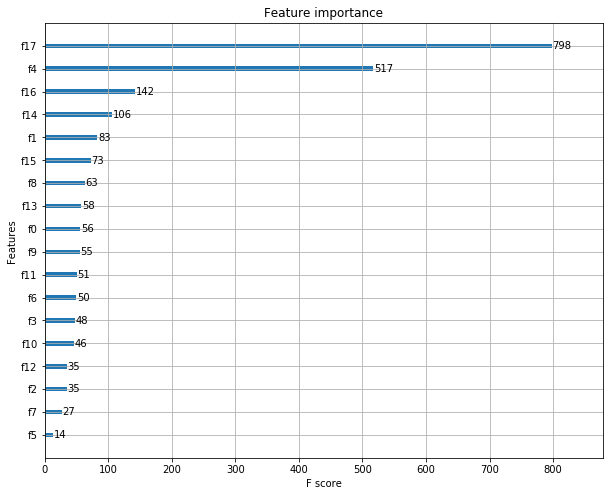

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb, ax = ax)

### Final Conclusions

To avoid customer churning, company must take following measures:

> Encourage people to go for 2 year contracts by reducing prices of such plan

> Increase focus on providing tech support to every customer

> Focus on customers paying via e-Checks. Because they have tendency to leave. By concentrating and paying special attention to such customers, company might reduce churning rates

> Providing extra attention and services to new customers (ones with lesser tenure)

These factors absolutely make sense because, new customers are considered as less loyal and they have high tendency to stop services. In addition to this, if one takes lengthy contract, then he/she is less likely to churn because that customer has invested in the long run and doesn't wants money to get wasted.
It might be also possible that people who pay via e-Checks might not visit offices and hence, have no awareness about tech support and hence churn out.

Following offers can be made by the company:
> Discount for first few months to new customers
> Benefits for customers with higher tenure in order to make customers go for longer durations
> Extra services to customers opting for year long or 2 year contracts
> Cashbacks on card payments 
> Free/Regular Tech Assistance to every customer
> Extra benefits to people with no partner

If these actions were implemented, we can determine the success by examining the following:
> Decrease in number of customers with month to month contracts
> Significant increase in customers availing tech support
> Gradual increase in mean tenure of customers